#### **Giới thiệu**

Bộ dữ liệu `Sample Superstore Dataset` mô tả các loại hàng được vận chuyển với các giá cả tên phân loại hình thức vận chuyển mã số code ở một số các tiểu bang của Mý. Bộ dữ liệu này nhằm đánh giá xem làm sao mà một cửa hàng có thể vừa giảm chi phí mà có thể gia tăng / giữ được lợi nhuận

In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [57]:
df = pd.read_csv('SampleSuperstore.csv')
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [58]:
df.shape

(9994, 13)

In [59]:
df.tail()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
9989,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,25.248,3,0.2,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,91.960,2,0.0,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,258.576,2,0.2,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,29.600,4,0.0,13.3200
9993,Second Class,Consumer,United States,Westminster,California,92683,West,Office Supplies,Appliances,243.160,2,0.0,72.9480


In [60]:
df.columns

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')

#### **Đặc trưng**

* `Ship Mode` :  Loại hình vận chuyển - (Phổ thông, Hạng hai)
* `Segment` : Loại khách hàng - (Tiêu dùng, Công ty)
* `Country` : Quốc gia
* `City` : Thành phố
* `State` : Bang
* `Postal Code` : Mã vùng
* `Region` : Châu lục
* `Category` : Loại hàng hóa
* `Sub-Category` : Tên hàng hóa phụ
* `Sales` : Gía Sale
* `Quantity` : Chât lượng
* `Discount` : Goảm giá
* `Profit` : Lợi nhuận


In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [62]:
num_cols = df.select_dtypes(include=np.number).columns.tolist()
cat_cols = df.select_dtypes(include='object').columns.tolist()

num_cols, cat_cols

(['Postal Code', 'Sales', 'Quantity', 'Discount', 'Profit'],
 ['Ship Mode',
  'Segment',
  'Country',
  'City',
  'State',
  'Region',
  'Category',
  'Sub-Category'])

In [63]:
for col in cat_cols:
    print(f'{col}: {df[col].unique()}')

Ship Mode: ['Second Class' 'Standard Class' 'First Class' 'Same Day']
Segment: ['Consumer' 'Corporate' 'Home Office']
Country: ['United States']
City: ['Henderson' 'Los Angeles' 'Fort Lauderdale' 'Concord' 'Seattle'
 'Fort Worth' 'Madison' 'West Jordan' 'San Francisco' 'Fremont'
 'Philadelphia' 'Orem' 'Houston' 'Richardson' 'Naperville' 'Melbourne'
 'Eagan' 'Westland' 'Dover' 'New Albany' 'New York City' 'Troy' 'Chicago'
 'Gilbert' 'Springfield' 'Jackson' 'Memphis' 'Decatur' 'Durham' 'Columbia'
 'Rochester' 'Minneapolis' 'Portland' 'Saint Paul' 'Aurora' 'Charlotte'
 'Orland Park' 'Urbandale' 'Columbus' 'Bristol' 'Wilmington' 'Bloomington'
 'Phoenix' 'Roseville' 'Independence' 'Pasadena' 'Newark' 'Franklin'
 'Scottsdale' 'San Jose' 'Edmond' 'Carlsbad' 'San Antonio' 'Monroe'
 'Fairfield' 'Grand Prairie' 'Redlands' 'Hamilton' 'Westfield' 'Akron'
 'Denver' 'Dallas' 'Whittier' 'Saginaw' 'Medina' 'Dublin' 'Detroit'
 'Tampa' 'Santa Clara' 'Lakeville' 'San Diego' 'Brentwood' 'Chapel Hill'
 'Mo

#### **Mô tả dữ liệu**


In [64]:
df.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [65]:
df.describe(include='object')

,Ship Mode,Segment,Country,City,State,Region,Category,Sub-Category
count,9994,9994,9994,9994,9994,9994,9994,9994
unique,4,3,1,531,49,4,3,17
top,Standard Class,Consumer,United States,New York City,California,West,Office Supplies,Binders
freq,5968,5191,9994,915,2001,3203,6026,1523


#### **Khám phá dữ liệu (EDA)**

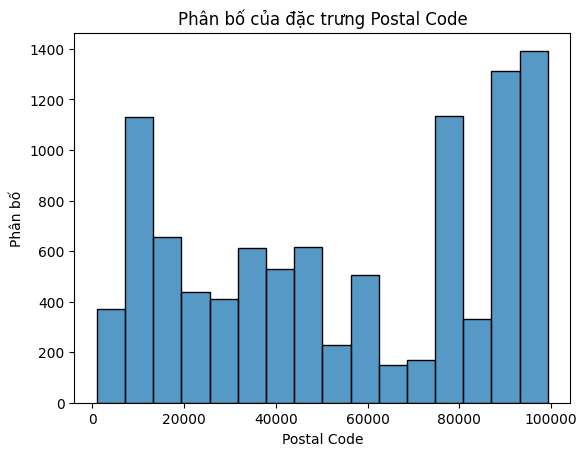

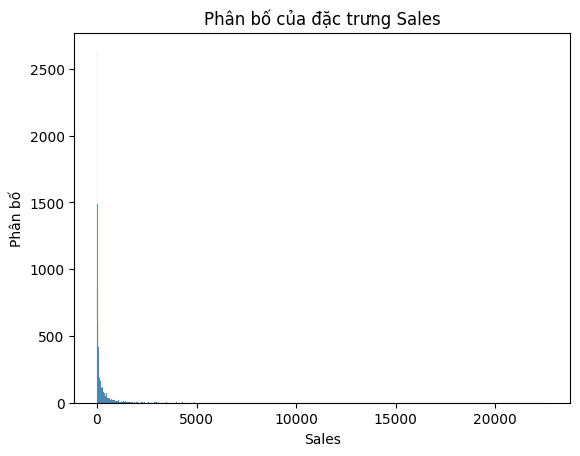

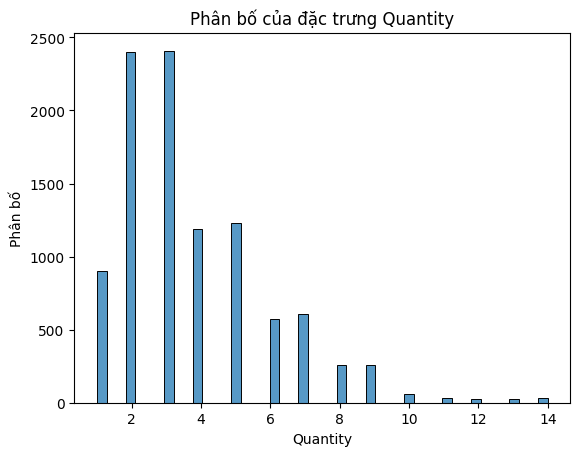

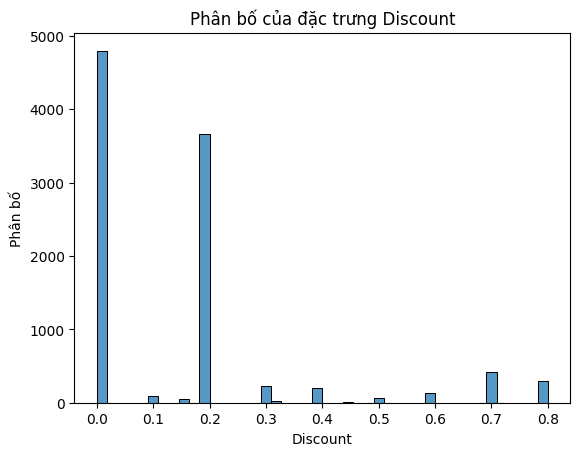

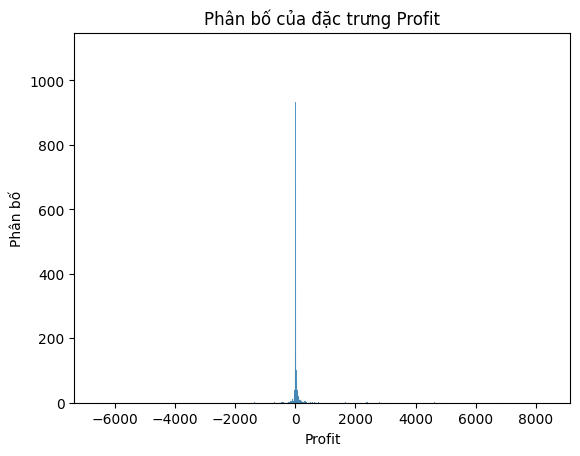

In [66]:
for col in num_cols:
  sns.histplot(df[col])
  plt.title(f'Phân bố của đặc trưng {col}')
  plt.ylabel('Phân bố')
  plt.show()

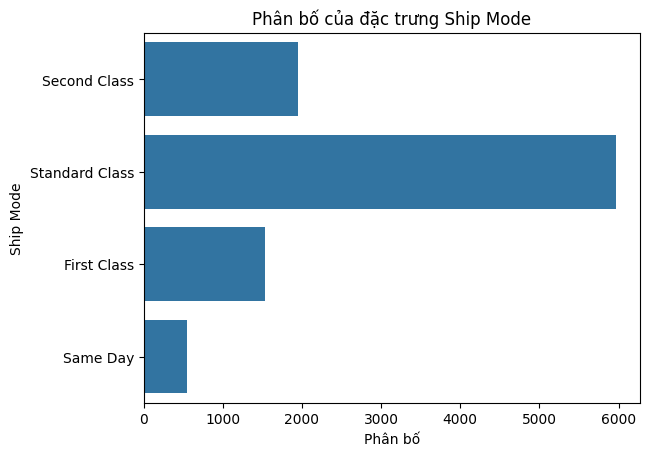

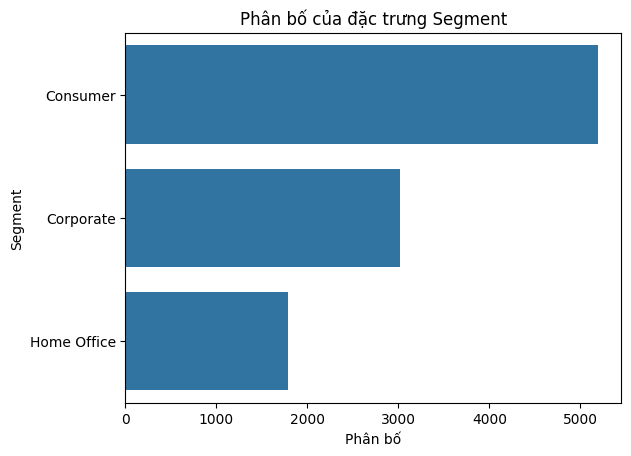

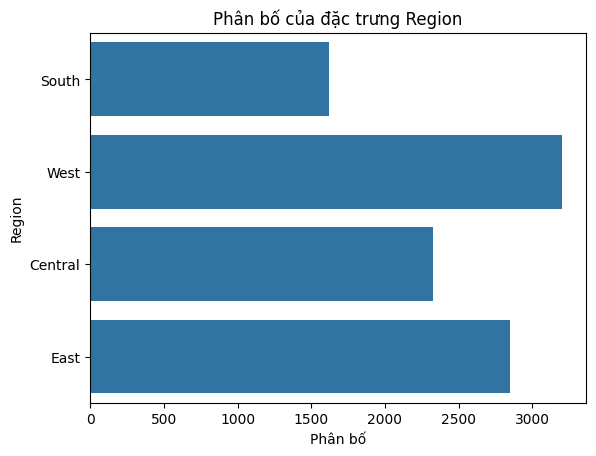

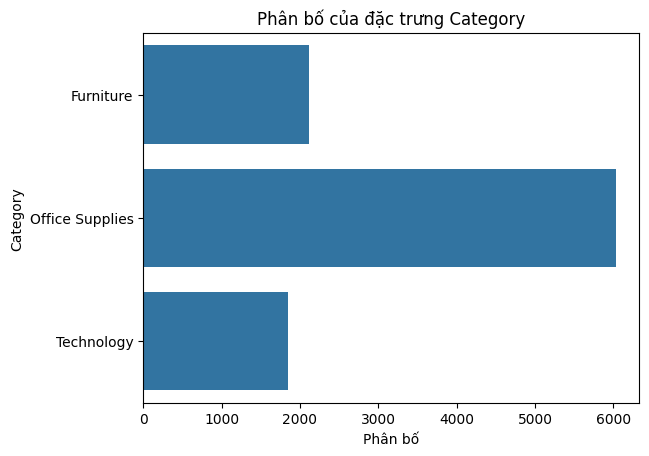

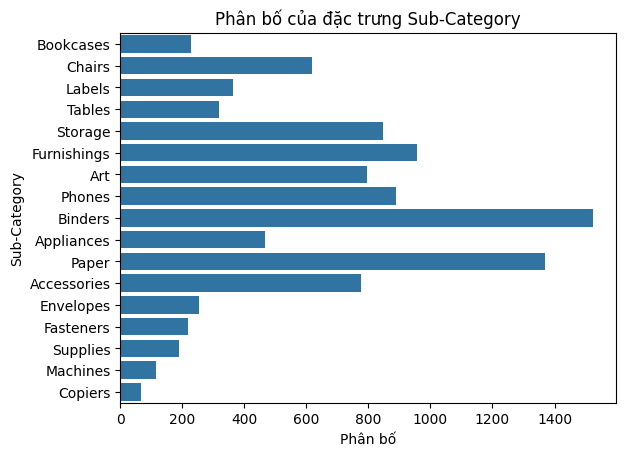

In [67]:
cols = ['Ship Mode', 'Segment', 'Region', 'Category', 'Sub-Category']

for col in cols:
  sns.countplot(df[col])
  plt.title(f'Phân bố của đặc trưng {col}')
  plt.xlabel('Phân bố')
  plt.show()

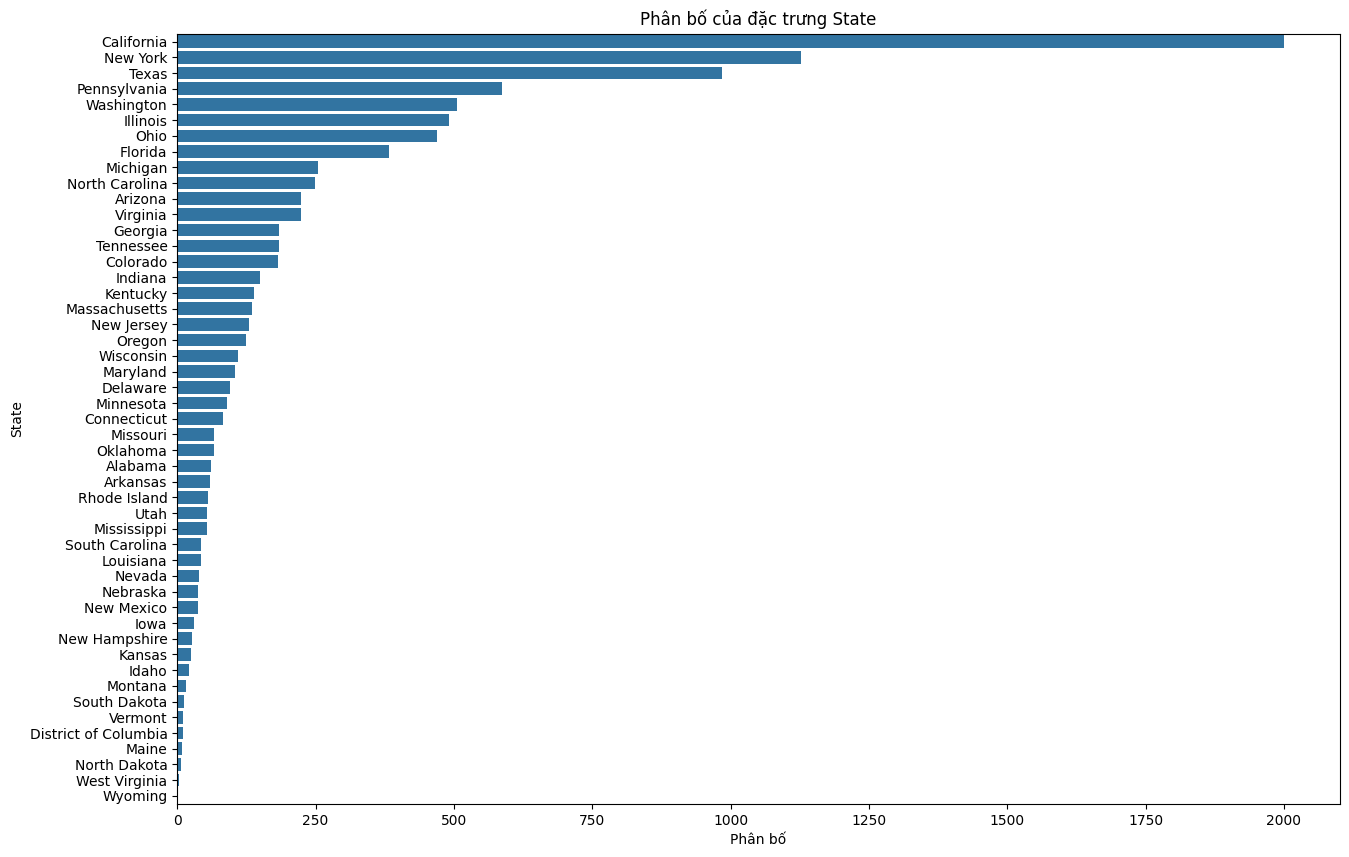

In [71]:
plt.figure(figsize=(15, 10))
sns.countplot(df['State'], order=df['State'].value_counts().index)
plt.title(f'Phân bố của đặc trưng State')
plt.xlabel('Phân bố')
plt.show()

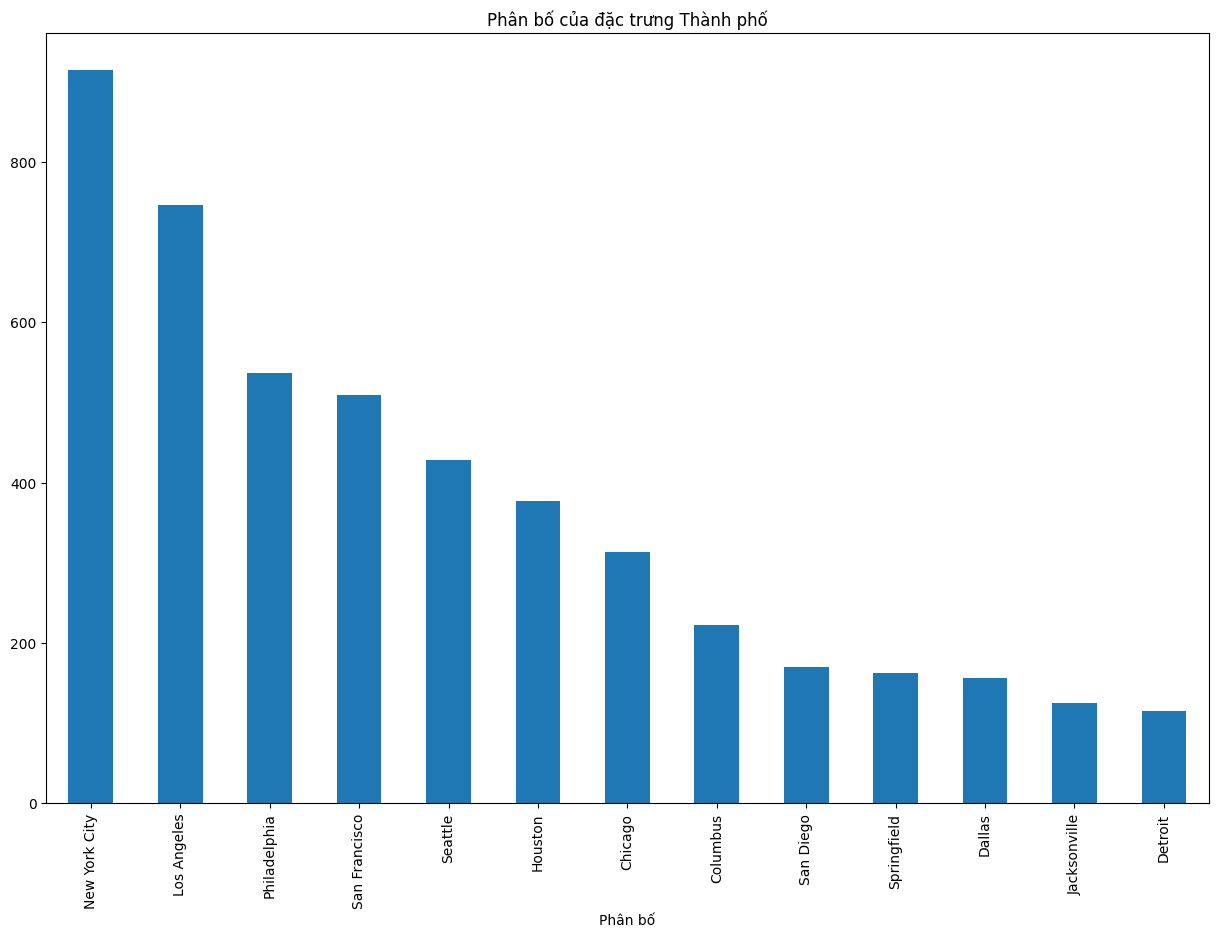

In [70]:
counts = df['City'].value_counts()
filtered_counts = counts[counts > 100]
filtered_counts.plot(kind = 'bar', figsize = (15, 10))
plt.title(f'Phân bố của đặc trưng Thành phố')
plt.xlabel('Phân bố')
plt.show()

* **Mục tiêu**
  * Hiểu vấn đề dữ liệu  🟩
  * Quan sát mối tương quan giữa các đặc trưng 🟥
    * Ship Mode vs. Sales, Quantity, Discount, Profit 🟥
    * Segment vs. Sales, Quantity, Discount, Profit 🟥
    * State vs. Sales, Quantity, Discount, Profit 🟥
    * City vs. Sales, Quantity, Discount, Profit 🟥
    * Region vs. Sales, Quantity, Discount, Profit 🟥
    * Category vs. Sales, Quantity, Discount, Profit 🟥
    * Sub-Category vs. Sales, Quantity, Discount, Profit 🟥
  * Quan sát môi tương quan tổng thể 🟥
  * Quan sát chi tiết từ 3 đặc trưng 🟥
    * Ship Mode vs. [Sales, Discount, Profit] 🟥
    * Segment vs. [Sales, Discount, Profit] 🟥
    * State vs. [Sales, Discount, Profit] 🟥
    * City vs. [Sales, Discount, Profit] 🟥
    * Region vs. [Sales, Discount, Profit] 🟥
    * Category vs. [Sales, Discount, Profit] 🟥
    * Sub-Category vs. [Sales, Discount, Profit] 🟥
  * Tách thành các đặc trưng mới để có thể quan sát nhiều hơn đối với (City và State)
    